In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google2pandas import *
conn = GoogleAnalyticsQuery(secrets='client_secrets.json', token_file_name='analytics.dat')
import time

In [297]:
df = pd.read_csv('conversions_anti_30.csv')

### Checking the data and its type

In [298]:
df.head()

name  \
0  Conv - Norton   
1  Conv - Norton   
2  Conv - Norton   
3  Conv - Norton   
4  Conv - Norton   

                                                                                          gclid  \
0                                                                                           NaN   
1  Cj0KCQiA04XxBRD5ARIsAGFygj8I_IyKyBwSzaZAKvHEJL6ve1m-ppNZXP_sg1QdI9fJrdFi8tvohaYaAspHEALw_wcB   
2                                       EAIaIQobChMIyeKBg5SL5wIVx8YYCh03KQODEAAYASAAEgIBYvD_BwE   
3  Cj0KCQiA04XxBRD5ARIsAGFygj_LxcEHKhVGCT4Cs4gDUSHfS3psW3HxnYhoJgpx2FCrs8PM9KFQsDsaAjtnEALw_wcB   
4                                       EAIaIQobChMIo8HIkfmK5wIVxYCRCh1QggfyEAMYAyAAEgLn3vD_BwE   

    value                 datetime currency browser device country  
0   5.957  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN  
1   5.957  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN  
2   3.476  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN  
3   6.951  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN  
4  85.000  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 8 columns):
name        975 non-null object
gclid       928 non-null object
value       975 non-null float64
datetime    975 non-null object
currency    975 non-null object
browser     469 non-null object
device      540 non-null object
country     542 non-null object
dtypes: float64(1), object(7)
memory usage: 61.0+ KB


In [300]:
print(df['datetime'].iloc[0])
type(df['datetime'].iloc[0])

20200119 040008 Etc/GMT


str

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 8 columns):
name        975 non-null object
gclid       928 non-null object
value       975 non-null float64
datetime    975 non-null object
currency    975 non-null object
browser     469 non-null object
device      540 non-null object
country     542 non-null object
dtypes: float64(1), object(7)
memory usage: 61.0+ KB


### Check for null values

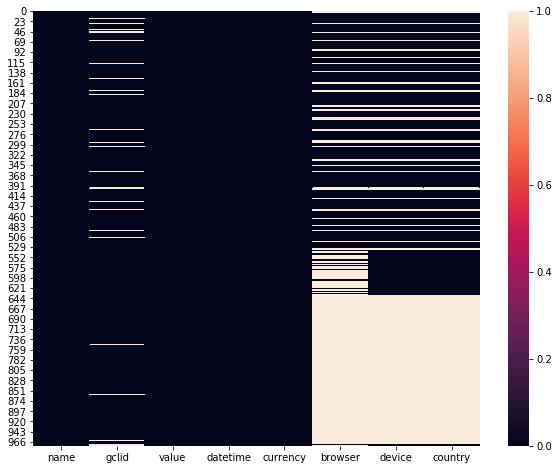

In [302]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.isnull())

In [303]:
df[df['name'].isnull()]

Empty DataFrame
Columns: [name, gclid, value, datetime, currency, browser, device, country]
Index: []

In [304]:
df['name'].isnull().sum()

0

#### filling the null values 

In [305]:
df['name'].fillna(value = 'no partner name', inplace=True)

In [306]:
df['name'].isnull().sum()

0

In [307]:
df.head()

name  \
0  Conv - Norton   
1  Conv - Norton   
2  Conv - Norton   
3  Conv - Norton   
4  Conv - Norton   

                                                                                          gclid  \
0                                                                                           NaN   
1  Cj0KCQiA04XxBRD5ARIsAGFygj8I_IyKyBwSzaZAKvHEJL6ve1m-ppNZXP_sg1QdI9fJrdFi8tvohaYaAspHEALw_wcB   
2                                       EAIaIQobChMIyeKBg5SL5wIVx8YYCh03KQODEAAYASAAEgIBYvD_BwE   
3  Cj0KCQiA04XxBRD5ARIsAGFygj_LxcEHKhVGCT4Cs4gDUSHfS3psW3HxnYhoJgpx2FCrs8PM9KFQsDsaAjtnEALw_wcB   
4                                       EAIaIQobChMIo8HIkfmK5wIVxYCRCh1QggfyEAMYAyAAEgLn3vD_BwE   

    value                 datetime currency browser device country  
0   5.957  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN  
1   5.957  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN  
2   3.476  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN  
3   6.951  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN  
4  85.000  20200119 040008 Etc/GMT      USD     NaN    NaN     NaN

In [308]:
df['gclid'].isnull().sum()

47

In [309]:
df[df['gclid'].isnull()]

name gclid    value                             datetime  \
0    Conv - Norton   NaN    5.957              20200119 040008 Etc/GMT   
5    Conv - Norton   NaN   85.000              20200119 040008 Etc/GMT   
18   Conv - Norton   NaN   85.000              20200120 000150 Etc/GMT   
25   Conv - Norton   NaN   60.000              20200120 220202 Etc/GMT   
29   Conv - Norton   NaN   85.000              20200121 043057 Etc/GMT   
34   Conv - Norton   NaN   85.000              20200121 140616 Etc/GMT   
42   Conv - Norton   NaN   85.000              20200121 210208 Etc/GMT   
46   Conv - Norton   NaN   85.000              20200122 013210 Etc/GMT   
47   Conv - Norton   NaN   85.000              20200122 023051 Etc/GMT   
49   Conv - Norton   NaN   85.000              20200122 043123 Etc/GMT   
50   Conv - Norton   NaN   60.000              20200122 063031 Etc/GMT   
52   Conv - Norton   NaN   60.000              20200122 083032 Etc/GMT   
55   Conv - Norton   NaN   85.000              20200122 123028 Etc/GMT   
57   Conv - Norton   NaN    4.847              20200122 170157 Etc/GMT   
64   Conv - Norton   NaN   85.000              20200122 193228 Etc/GMT   
67   Conv - Norton   NaN    3.476              20200122 193229 Etc/GMT   
118  Conv - Norton   NaN   85.000              20200126 043014 Etc/GMT   
119  Conv - Norton   NaN   85.000              20200126 043014 Etc/GMT   
152   Conv - Panda   NaN   62.500              20200127 203226 Etc/GMT   
179  Conv - Norton   NaN   85.000              20200129 043056 Etc/GMT   
188  Conv - Norton   NaN   85.000              20200129 160041 Etc/GMT   
266  Conv - Norton   NaN   85.000              20200203 043028 Etc/GMT   
267  Conv - Norton   NaN   85.000              20200203 043028 Etc/GMT   
270  Conv - Norton   NaN   85.000              20200203 043028 Etc/GMT   
281   Conv - Panda   NaN   62.500              20200203 193606 Etc/GMT   
296  Conv - Norton   NaN   85.000              20200204 050025 Etc/GMT   
304  Conv - Norton   NaN   85.000              20200205 043028 Etc/GMT   
305  Conv - Norton   NaN   85.000              20200205 043028 Etc/GMT   
337  Conv - Norton   NaN   85.000              20200207 043128 Etc/GMT   
360  Conv - Norton   NaN   85.000              20200209 043021 Etc/GMT   
361  Conv - Norton   NaN   85.000              20200209 043021 Etc/GMT   
387  Conv - Norton   NaN   85.000              20200210 043045 Etc/GMT   
397  Conv - Norton   NaN   85.000              20200210 190136 Etc/GMT   
399  Conv - Norton   NaN   85.000              20200210 190138 Etc/GMT   
400  Conv - Norton   NaN   85.000              20200210 190202 Etc/GMT   
428  Conv - Norton   NaN   85.000              20200212 143040 Etc/GMT   
446  Conv - Norton   NaN   85.000              20200213 043035 Etc/GMT   
449  Conv - Norton   NaN   85.000              20200213 043037 Etc/GMT   
493  Conv - Norton   NaN   85.000              20200216 043056 Etc/GMT   
509  Conv - Norton   NaN   85.000              20200216 230014 Etc/GMT   
535  Conv - Norton   NaN   85.000              20200218 040042 Etc/GMT   
749   Conv - Panda   NaN   72.000  20200207 064827 America/Los_Angeles   
803   Conv - Panda   NaN   72.000  20200130 010025 America/Los_Angeles   
861   Conv - Panda   NaN   72.000  20200202 083113 America/Los_Angeles   
964   Conv - Total   NaN   90.000              20200120 132018 Etc/GMT   
973    Conv - Airo   NaN  110.000              20200204 121427 Etc/GMT   
974    Conv - Airo   NaN  110.000              20200204 175130 Etc/GMT   

    currency  browser        device  country  
0        USD      NaN           NaN      NaN  
5        USD      NaN           NaN      NaN  
18       USD   Safari       Desktop       BR  
25       USD   Chrome       Desktop       NO  
29       USD      NaN           NaN      NaN  
34       USD   Chrome       Desktop       CO  
42       USD   Safari       Desktop       EC  
46       USD   Chrome       Desktop       BR  
47       USD   Safari       Desktop   

In [310]:
df['value'].max()

255.0

In [311]:
df['value'].min()

-85.0

In [312]:
df[(df['value'] > 150) | (df['value'] < 0)]

name  \
148     Conv - Norton   
240     Conv - Norton   
317  Conv - BullGuard   

                                                                                           gclid  \
148                                      EAIaIQobChMIpbeD6KGk5wIVxcmyCh3ItQFsEAAYBCAAEgLLuPD_BwE   
240  CjwKCAiA1L_xBRA2EiwAgcLKA6F7Zz00EtXKdHAi3bQ3AM9eQkt6X19owK12nz4CTU58ny1Mq9w2uRoCyUsQAvD_BwE   
317                                      EAIaIQobChMIqLW36qCF5wIVRuJ3Ch0qZAlLEAAYASABEgJjZPD_BwE   

       value                 datetime currency  browser   device country  
148  255.000  20200127 190146 Etc/GMT      USD  Firefox  Desktop      TR  
240  -85.000  20200202 033821 Etc/GMT      USD      NaN      NaN     NaN  
317  -38.905  20200205 233009 Etc/GMT      USD      NaN      NaN      DE

In [313]:
## delete rows with negative commission value
df = df[df['value'] > 0]

In [314]:
df[df['value'] < 0]

Empty DataFrame
Columns: [name, gclid, value, datetime, currency, browser, device, country]
Index: []

In [315]:
df['gclid'].fillna(value='no gclid value', inplace=True)

In [316]:
df[df['gclid'].isnull()]

Empty DataFrame
Columns: [name, gclid, value, datetime, currency, browser, device, country]
Index: []

In [317]:
df['browser'].fillna(value='no browser value', inplace=True)
df['device'].fillna(value='no device value', inplace=True)
df['country'].fillna(value='no country value', inplace=True)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 0 to 974
Data columns (total 8 columns):
name        968 non-null object
gclid       968 non-null object
value       968 non-null float64
datetime    968 non-null object
currency    968 non-null object
browser     968 non-null object
device      968 non-null object
country     968 non-null object
dtypes: float64(1), object(7)
memory usage: 68.1+ KB


### Checking the amount of conversions per partner

In [319]:
plot_df = df.groupby(by=['name']).agg({'gclid':'count'}).reset_index().sort_values(by='gclid', ascending=False)

In [320]:
plot_df.head()

name  gclid
4  Conv - Norton    392
5   Conv - Panda    301
3  Conv - McAfee    134
2  Conv - Intego    100
6   Conv - Total     30

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

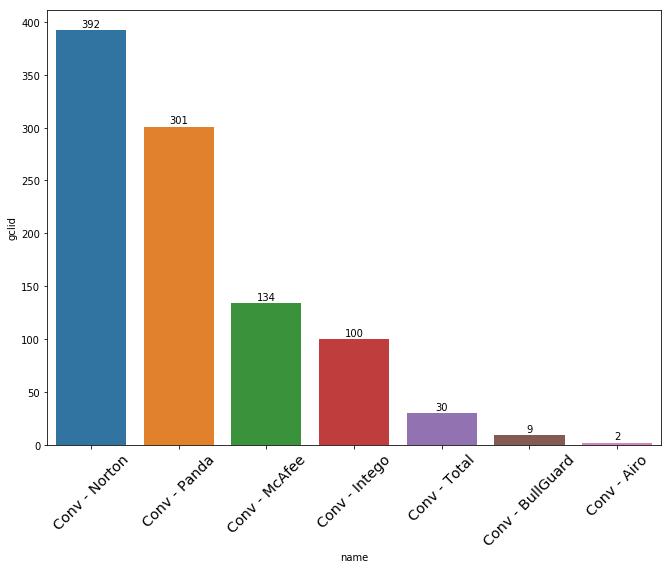

In [321]:
plt.figure(figsize=(11,8))
g = sns.barplot(x='name', y='gclid', data=plot_df)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+3, '{:1.0f}'.format(height), ha='center')
plt.xticks(rotation=45, fontweight='light', fontsize='x-large')

In [322]:
avg_df = df.groupby(by=['name']).agg({'value':'mean'}).reset_index().sort_values(by='value', ascending=False)

In [323]:
avg_df.head()

name       value
0    Conv - Airo  110.000000
6   Conv - Total   91.666667
2  Conv - Intego   90.000000
4  Conv - Norton   79.317253
5   Conv - Panda   68.322259

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

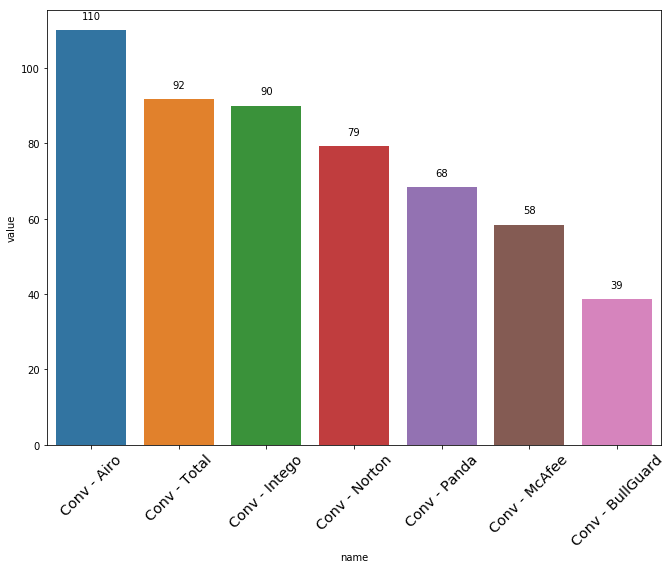

In [324]:
plt.figure(figsize=(11,8))
g = sns.barplot(x='name', y='value', data=avg_df)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+3, '{:1.0f}'.format(height), ha='center')
plt.xticks(rotation=45, fontweight='light', fontsize='x-large')

### prepare the date column and the partners name

In [325]:
df['datetime'] = df['datetime'].str[:8]

In [326]:
df['name'] = df['name'].str.lower()

In [327]:
df['name'] = df['name'].str[7:]

In [328]:
df.head()

name  \
0  norton   
1  norton   
2  norton   
3  norton   
4  norton   

                                                                                          gclid  \
0                                                                                no gclid value   
1  Cj0KCQiA04XxBRD5ARIsAGFygj8I_IyKyBwSzaZAKvHEJL6ve1m-ppNZXP_sg1QdI9fJrdFi8tvohaYaAspHEALw_wcB   
2                                       EAIaIQobChMIyeKBg5SL5wIVx8YYCh03KQODEAAYASAAEgIBYvD_BwE   
3  Cj0KCQiA04XxBRD5ARIsAGFygj_LxcEHKhVGCT4Cs4gDUSHfS3psW3HxnYhoJgpx2FCrs8PM9KFQsDsaAjtnEALw_wcB   
4                                       EAIaIQobChMIo8HIkfmK5wIVxYCRCh1QggfyEAMYAyAAEgLn3vD_BwE   

    value  datetime currency           browser           device  \
0   5.957  20200119      USD  no browser value  no device value   
1   5.957  20200119      USD  no browser value  no device value   
2   3.476  20200119      USD  no browser value  no device value   
3   6.951  20200119      USD  no browser value  no device value   
4  85.000  20200119      USD  no browser value  no device value   

            country  
0  no country value  
1  no country value  
2  no country value  
3  no country value  
4  no country value

## TODO: 
###### Create a function that converts all ISO code to country name

In [329]:
df[df['gclid'] == 'no gclid value'].count()

name        47
gclid       47
value       47
datetime    47
currency    47
browser     47
device      47
country     47
dtype: int64

In [330]:
dup_rows_df = df[df.duplicated('gclid')]

In [334]:
dup_rows_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 28 to 921
Data columns (total 8 columns):
name        26 non-null object
gclid       26 non-null object
value       26 non-null float64
datetime    26 non-null object
currency    26 non-null object
browser     26 non-null object
device      26 non-null object
country     26 non-null object
dtypes: float64(1), object(7)
memory usage: 1.8+ KB


In [332]:
dup_rows_df = dup_rows_df[dup_rows_df['gclid'] != 'no gclid value']

In [333]:
dup_rows_df.head()

name  \
28  norton   
48  norton   
68  norton   
88  norton   
89  norton   

                                                                                           gclid  \
28  Cj0KCQiAmZDxBRDIARIsABnkbYSK_CPre7g1QGdFYmMOSgTc3y1VtxfKjyMGBI5kJ8RWrqty2MiYyv0aAoNJEALw_wcB   
48  Cj0KCQiAvJXxBRCeARIsAMSkAprIwAejOo1xHZEhr_WTGTVd_FO3FJR93tUoI8K_g9xba4OZPwGpMfsaAmcXEALw_wcB   
68   CjwKCAiA35rxBRAWEiwADqB379woB3S8YVFdzKQC-kX9-mmhggPfd7rCYWIy7TZcTSeWdpDUXqheaRoCU4oQAvD_BwE   
88   CjwKCAiAgqDxBRBTEiwA59eENyA6GUnuQFHi0qyfgk3mdBClnkiW9VyNmGzBiBQnPhpSb0Ec9DenrBoCYIkQAvD_BwE   
89   CjwKCAiAgqDxBRBTEiwA59eEN3XBuXV_SYRcwp5qemqj7xVKhBwVSczFou-2WrVToupN4xYWrW50WBoC8F0QAvD_BwE   

    value  datetime currency           browser           device  \
28  5.957  20200121      USD  no browser value  no device value   
48  3.476  20200122      USD  no browser value  no device value   
68  3.476  20200122      USD  no browser value  no device value   
88  3.476  20200124      USD  no browser value  no device value   
89  6.293  20200124      USD  no browser value  no device value   

             country  
28  no country value  
48  no country value  
68  no country value  
88  no country value  
89  no country value

In [118]:
pd.options.display.max_colwidth = 100

In [119]:
# dup_rows_df.head(100)

In [335]:
df[df['gclid'] == 'Cj0KCQiA7OnxBRCNARIsAIW53B-1WspR2C8FAhmc0imOxHQVbHvxKh7RAK4lbEx-91imf3G48zweNzoaAqstEALw_wcB']

name  \
322  norton   
336  norton   

                                                                                            gclid  \
322  Cj0KCQiA7OnxBRCNARIsAIW53B-1WspR2C8FAhmc0imOxHQVbHvxKh7RAK4lbEx-91imf3G48zweNzoaAqstEALw_wcB   
336  Cj0KCQiA7OnxBRCNARIsAIW53B-1WspR2C8FAhmc0imOxHQVbHvxKh7RAK4lbEx-91imf3G48zweNzoaAqstEALw_wcB   

     value  datetime currency           browser           device  \
322   85.0  20200206      USD            Chrome          Desktop   
336   85.0  20200207      USD  no browser value  no device value   

              country  
322                TR  
336  no country value

In [120]:
df.drop_duplicates(subset='gclid', keep='first', inplace=True)

In [336]:
df = df[df['gclid'] != 'no gclid value']

# Clear all duplicate values from gclid

In [34]:
df.drop_duplicates(subset = 'gclid', keep='first', inplace=True)

In [133]:
df = df[df['gclid'] != 'no gclid value']

In [337]:
df.head()

name  \
1  norton   
2  norton   
3  norton   
4  norton   
6  mcafee   

                                                                                          gclid  \
1  Cj0KCQiA04XxBRD5ARIsAGFygj8I_IyKyBwSzaZAKvHEJL6ve1m-ppNZXP_sg1QdI9fJrdFi8tvohaYaAspHEALw_wcB   
2                                       EAIaIQobChMIyeKBg5SL5wIVx8YYCh03KQODEAAYASAAEgIBYvD_BwE   
3  Cj0KCQiA04XxBRD5ARIsAGFygj_LxcEHKhVGCT4Cs4gDUSHfS3psW3HxnYhoJgpx2FCrs8PM9KFQsDsaAjtnEALw_wcB   
4                                       EAIaIQobChMIo8HIkfmK5wIVxYCRCh1QggfyEAMYAyAAEgLn3vD_BwE   
6                                       EAIaIQobChMIysCuyLOP5wIVSuJ3Ch3mdgymEAAYAiAAEgJxhvD_BwE   

    value  datetime currency           browser           device  \
1   5.957  20200119      USD  no browser value  no device value   
2   3.476  20200119      USD  no browser value  no device value   
3   6.951  20200119      USD  no browser value  no device value   
4  85.000  20200119      USD  no browser value  no device value   
6  90.000  20200119      USD            Safari          Desktop   

            country  
1  no country value  
2  no country value  
3  no country value  
4  no country value  
6                DE

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 1 to 967
Data columns (total 8 columns):
name        921 non-null object
gclid       921 non-null object
value       921 non-null float64
datetime    921 non-null object
currency    921 non-null object
browser     921 non-null object
device      921 non-null object
country     921 non-null object
dtypes: float64(1), object(7)
memory usage: 64.8+ KB


In [339]:
df['date_time'] = pd.to_datetime(df['datetime'])

In [340]:
df['month'] = df['date_time'].apply(lambda x: x.month)

In [341]:
df.head()

name  \
1  norton   
2  norton   
3  norton   
4  norton   
6  mcafee   

                                                                                          gclid  \
1  Cj0KCQiA04XxBRD5ARIsAGFygj8I_IyKyBwSzaZAKvHEJL6ve1m-ppNZXP_sg1QdI9fJrdFi8tvohaYaAspHEALw_wcB   
2                                       EAIaIQobChMIyeKBg5SL5wIVx8YYCh03KQODEAAYASAAEgIBYvD_BwE   
3  Cj0KCQiA04XxBRD5ARIsAGFygj_LxcEHKhVGCT4Cs4gDUSHfS3psW3HxnYhoJgpx2FCrs8PM9KFQsDsaAjtnEALw_wcB   
4                                       EAIaIQobChMIo8HIkfmK5wIVxYCRCh1QggfyEAMYAyAAEgLn3vD_BwE   
6                                       EAIaIQobChMIysCuyLOP5wIVSuJ3Ch3mdgymEAAYAiAAEgJxhvD_BwE   

    value  datetime currency           browser           device  \
1   5.957  20200119      USD  no browser value  no device value   
2   3.476  20200119      USD  no browser value  no device value   
3   6.951  20200119      USD  no browser value  no device value   
4  85.000  20200119      USD  no browser value  no device value   
6  90.000  20200119      USD            Safari          Desktop   

            country  date_time  month  
1  no country value 2020-01-19      1  
2  no country value 2020-01-19      1  
3  no country value 2020-01-19      1  
4  no country value 2020-01-19      1  
6                DE 2020-01-19      1

In [342]:
month_map = {1: 'January', 2:'February', 3: 'March', 4: 'April', 5:'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['month'] = df['month'].map(month_map)

In [343]:
df.head()

name  \
1  norton   
2  norton   
3  norton   
4  norton   
6  mcafee   

                                                                                          gclid  \
1  Cj0KCQiA04XxBRD5ARIsAGFygj8I_IyKyBwSzaZAKvHEJL6ve1m-ppNZXP_sg1QdI9fJrdFi8tvohaYaAspHEALw_wcB   
2                                       EAIaIQobChMIyeKBg5SL5wIVx8YYCh03KQODEAAYASAAEgIBYvD_BwE   
3  Cj0KCQiA04XxBRD5ARIsAGFygj_LxcEHKhVGCT4Cs4gDUSHfS3psW3HxnYhoJgpx2FCrs8PM9KFQsDsaAjtnEALw_wcB   
4                                       EAIaIQobChMIo8HIkfmK5wIVxYCRCh1QggfyEAMYAyAAEgLn3vD_BwE   
6                                       EAIaIQobChMIysCuyLOP5wIVSuJ3Ch3mdgymEAAYAiAAEgJxhvD_BwE   

    value  datetime currency           browser           device  \
1   5.957  20200119      USD  no browser value  no device value   
2   3.476  20200119      USD  no browser value  no device value   
3   6.951  20200119      USD  no browser value  no device value   
4  85.000  20200119      USD  no browser value  no device value   
6  90.000  20200119      USD            Safari          Desktop   

            country  date_time    month  
1  no country value 2020-01-19  January  
2  no country value 2020-01-19  January  
3  no country value 2020-01-19  January  
4  no country value 2020-01-19  January  
6                DE 2020-01-19  January

In [130]:
# clear all january dates
df = df[df['month'] == 'February']

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 1 to 967
Data columns (total 10 columns):
name         921 non-null object
gclid        921 non-null object
value        921 non-null float64
datetime     921 non-null object
currency     921 non-null object
browser      921 non-null object
device       921 non-null object
country      921 non-null object
date_time    921 non-null datetime64[ns]
month        921 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 79.1+ KB


In [345]:
df.head()

name  \
1  norton   
2  norton   
3  norton   
4  norton   
6  mcafee   

                                                                                          gclid  \
1  Cj0KCQiA04XxBRD5ARIsAGFygj8I_IyKyBwSzaZAKvHEJL6ve1m-ppNZXP_sg1QdI9fJrdFi8tvohaYaAspHEALw_wcB   
2                                       EAIaIQobChMIyeKBg5SL5wIVx8YYCh03KQODEAAYASAAEgIBYvD_BwE   
3  Cj0KCQiA04XxBRD5ARIsAGFygj_LxcEHKhVGCT4Cs4gDUSHfS3psW3HxnYhoJgpx2FCrs8PM9KFQsDsaAjtnEALw_wcB   
4                                       EAIaIQobChMIo8HIkfmK5wIVxYCRCh1QggfyEAMYAyAAEgLn3vD_BwE   
6                                       EAIaIQobChMIysCuyLOP5wIVSuJ3Ch3mdgymEAAYAiAAEgJxhvD_BwE   

    value  datetime currency           browser           device  \
1   5.957  20200119      USD  no browser value  no device value   
2   3.476  20200119      USD  no browser value  no device value   
3   6.951  20200119      USD  no browser value  no device value   
4  85.000  20200119      USD  no browser value  no device value   
6  90.000  20200119      USD            Safari          Desktop   

            country  date_time    month  
1  no country value 2020-01-19  January  
2  no country value 2020-01-19  January  
3  no country value 2020-01-19  January  
4  no country value 2020-01-19  January  
6                DE 2020-01-19  January

In [347]:
df['date_time'].value_counts().sort_values()

2020-02-18     6
2020-02-11    22
2020-01-20    23
2020-02-08    23
2020-02-04    23
2020-02-15    23
2020-02-07    24
2020-02-13    24
2020-01-23    25
2020-02-05    26
2020-01-30    26
2020-02-14    26
2020-01-31    27
2020-01-19    27
2020-02-16    28
2020-02-02    28
2020-02-06    29
2020-01-26    30
2020-02-12    30
2020-01-21    31
2020-01-25    33
2020-01-28    33
2020-01-24    33
2020-02-10    34
2020-02-01    34
2020-01-29    35
2020-02-17    36
2020-02-09    42
2020-01-22    43
2020-02-03    44
2020-01-27    53
Name: date_time, dtype: int64

## uploading the Analytics report
### TODO - Create an API connection to Analytics 
##### right now I have uploaded the data manually and need in the future to automate it by an API call to Analytics.

In [137]:
#analytics_df = pd.read_excel('analytics_jan.xlsx')

# Calling the Analytics API
#### Create an API call and extracting the desired values by "query" dict.

In [348]:
start = time.time()
startIndex = 1
maxResults = 10000
df_list = []

query = {\
            'ids': '182688681',
            'metrics':['totalEvents'],
            'dimensions':['date', 'dimension1', 'dimension2', 'country', 'pagePath', 'deviceCategory', 'eventLabel'],
            'start_date': '2020-01-19',
            'end_date': '2020-02-17',
            'start_index': startIndex,
            'max_results': maxResults,
            'filters': 'ga:eventCategory==redirect'
        }

# getting the max results variable
df_first, metadata = conn.execute_query(**query)
total_results = metadata.get('totalResults')
print('The total rows are %d' %total_results)

# Appending the first df to the list of data frames
df_list.append(df_first)
print('start index is %d, and max result is %d' % (startIndex, maxResults))
print('df_list has %d items' % len(df_list))

# End of first iteration
# preparing for the 2nd iteration and so on
# check if total results is larger then 10K, or stop after the first iteration
try:
    while total_results > maxResults:
        startIndex += 10000
        temp_subs = total_results - maxResults
        if temp_subs >= 10000:
            maxResults += 10000
        else:
            maxResults = total_results
        query = {\
                'ids': '182688681',
                'metrics':['totalEvents'],
                'dimensions':['date', 'dimension1', 'dimension2', 'country', 'pagePath', 'deviceCategory', 'eventLabel'],
                'start_date': '2020-01-19',
                'end_date': '2020-02-17',
                'start_index': startIndex,
                'max_results': maxResults,
                'filters': 'ga:eventCategory==redirect'
            }
        df_first, metadata = conn.execute_query(**query)
        df_list.append(df_first)
        print('start index is %d, and max result is %d' % (startIndex, maxResults))
        print('df_list has %d items' % len(df_list))
except Exception as e:
    print(str(e))
    

new_df = pd.concat(df_list) 
new_df.info()
new_df.head(20)

The total rows are 46327
start index is 1, and max result is 10000
df_list has 1 items
start index is 10001, and max result is 20000
df_list has 2 items
start index is 20001, and max result is 30000
df_list has 3 items
start index is 30001, and max result is 40000
df_list has 4 items
start index is 40001, and max result is 46327
df_list has 5 items
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46327 entries, 0 to 6326
Data columns (total 8 columns):
date              46327 non-null object
dimension1        46327 non-null object
dimension2        46327 non-null object
country           46327 non-null object
pagePath          46327 non-null object
deviceCategory    46327 non-null object
eventLabel        46327 non-null object
totalEvents       46327 non-null int64
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


date             dimension1  \
0   20200119  1002014267.1579430442   
1   20200119  1002672977.1579494423   
2   20200119  1003479156.1579453521   
3   20200119  1003897412.1579504980   
4   20200119  1003897412.1579504980   
5   20200119  1004673591.1579476395   
6   20200119  1004673591.1579476395   
7   20200119  1004765863.1579454838   
8   20200119  1004765863.1579454838   
9   20200119  1009245582.1579454998   
10  20200119    10152023.1579464692   
11  20200119  1015512903.1579451516   
12  20200119  1015514590.1579488637   
13  20200119  1016755785.1579493085   
14  20200119  1016755785.1579493085   
15  20200119  1016755785.1579493085   
16  20200119  1017852479.1579484825   
17  20200119  1021046882.1579467644   
18  20200119  1021853644.1579442815   
19  20200119  1024091402.1579493455   

                                                                                      dimension2  \
0                                        EAIaIQobChMI1Jj78LyP5wIVR-d3Ch0SWgodEAAYASAAEgJUgPD_BwE   
1                                        EAIaIQobChMI6LW8jquR5wIVCaGzCh2aPQT2EAAYAiAAEgLqJfD_BwE   
2                                        EAIaIQobChMIqJju55KQ5wIVA4jVCh2wHA9tEAAYAiAAEgKLxvD_BwE   
3   Cj0KCQiAmZDxBRDIARIsABnkbYSFcgDUfD7qoymu6h1uNAaB2Zkghs-zf9x57OWYcEfcO_pWs3Ho4DwaAmoUEALw_wcB   
4   Cj0KCQiAmZDxBRDIARIsABnkbYSFcgDUfD7qoymu6h1uNAaB2Zkghs-zf9x57OWYcEfcO_pWs3Ho4DwaAmoUEALw_wcB   
5                                        EAIaIQobChMI5vTIh-iQ5wIVCW6GCh12bAJHEAAYASAAEgKfFfD_BwE   
6                                        EAIaIQobChMI5vTIh-iQ5wIVCW6GCh12bAJHEAAYASAAEgKfFfD_BwE   
7   Cj0KCQiAmZDxBRDIARIsABnkbYQRQoPfYyvhnM6Hr4WoTrvqvIeynARGMq_eyLb05vOtABpwaJulW6gaArkbEALw_wcB   
8   Cj0KCQiAmZDxBRDIARIsABnkbYQRQoPfYyvhnM6Hr4WoTrvqvIeynARGMq_eyLb05vOtABpwaJulW6gaArkbEALw_wcB   
9   Cj0KCQiAmZDxBRDIARIsABnkbYTEImE1VrCpVHcKF8BfVYTLa15-wDvdYrXV_JjzeoVIFbB-2U-m-HQaApOkEALw_wcB   
10  Cj0KCQiAmZDxBRDIARIsABnkbYSWvwqjHKDzXe_h92kxLo1n93ezhQxdVzt3nYEIrRHiULG1ZEn_bC4aAt7TEALw_wcB   
11  Cj0KCQiAmZDxBRDIARIsABnkbYRYX1RtlhuFgFZvyyvBsQjPVRyuHRPpW2nW5VMNve9mE96LrYc3xl0aAn89EALw_wcB   
12  Cj0KCQiAmZDxBRDIARIsABnkbYRZqpP2k55eH4FqiS_oQLIZxoa0oAn8pvGLYFNtKb8_eN_0r3A3rLsaAt6FEALw_wcB   
13  Cj0KCQiAmZDxBRDIARIsABnkbYQ_hc6TuBvFt2f9YGBBR7KPPyED6dCzRJgNnAmXkRMvLJdL3MAi1bIaAk5dEALw_wcB   
14  Cj0KCQiAmZDxBRDIARIsABnkbYQ_hc6TuBvFt2f9YGBBR7KPPyED6dCzRJgNnAmXkRMvLJdL3MAi1bIaAk5dEALw_wcB   
15  Cj0KCQiAmZDxBRDIARIsABnkbYQ_hc6TuBvFt2f9YGBBR7KPPyED6dCzRJgNnAmXkRMvLJdL3MAi1bIaAk5dEALw_wcB   
16  Cj0KCQiAmZDxBRDIARIsABnkbYSuuh3oL43SJPTyBMVcTn_R-IdUJYj2QtJ2PF-BCib8nilKGJYpMBkaAm4AEALw_wcB   
17                                       EAIaIQobChMIo7i8useQ5wIViASRCh0vpgevEAAYASAAEgIuz_D_BwE   
18                                                                                     undefined   
19                                       EAIaIQobChMI9sHe0aeR5wIVCqsYCh1oKQorEAAYASAAEgKipPD_BwE   

                 country                pagePath deviceCategory  \
0                 Turkey                    /tr/        desktop   
1                 Mexico      /es/inicio-es-new/        desktop   
2   United Arab Emirates                    /ar/         mobile   
3                  Spain                    /es/         mobile   
4                  Spain  /es/reviews-es/mcafee/         mobile   
5               Colombia                    /es/        desktop   
6               Colombia                    /es/        desktop   
7                  Spain                    /es/         mobile   
8                  Spain                    /es/         mobile   
9                  Italy                    /it/        desktop   
10                 Spain                    /es/         mobile   
11              Thailand                    /th/        desktop   
12                France                    /fr/         mobile   
13                Brazil                    /pt/        desktop   
14                Brazil                    /pt/        desktop   
15             

In [349]:
analytics_df = new_df

In [350]:
analytics_df.rename(columns={'dimension1': 'clientId', 'dimension2': 'gclid'}, inplace=True)

In [355]:
## Create mac or not mac column
analytics_df['type'] = analytics_df['pagePath'].apply(lambda x: 'Mac' if 'bestmac' in x or 'product' in x else 'PC')

In [359]:
analytics_df[analytics_df['pagePath'].str.contains('products')]

date               clientId  \
413   20200119  1566455357.1579461215   
590   20200119   180771556.1579440682   
591   20200119   180771556.1579440682   
788   20200119  2059539096.1579468653   
1000  20200119      432365.1579452601   
1384  20200119   962079085.1579439461   
1404  20200119    98523162.1579491540   
1405  20200119   985685364.1576334454   
1406  20200119   985685364.1576334454   
1407  20200119   985685364.1576334454   
2226  20200120  2049375628.1579592904   
2703  20200120   665872541.1579515613   
2741  20200120   738353647.1579541777   
2905  20200120   915414064.1579508607   
2929  20200120   937804889.1579546700   
3111  20200121  1149373603.1579677608   
3388  20200121  1485568282.1579613623   
3450  20200121  1553669582.1579614445   
3529  20200121  1655714806.1579630995   
3566  20200121  1720527180.1579626596   
3951  20200121   285395717.1579636355   
4097  20200121   432365521.1579611684   
4152  20200121   498284826.1579679129   
4224  20200121   579132791.1579609184   
4448  20200121   860839890.1579608842   
4510  20200121   938174431.1579621587   
4598  20200122  1063621320.1579726980   
4602  20200122  1066349049.1579709926   
4649  20200122  1122969238.1579763305   
4650  20200122  1122969238.1579763305   
...        ...                    ...   
4778  20200217  1138262816.1581937646   
5094  20200217   147546731.1581791737   
5160  20200217  1563245440.1581929846   
5190  20200217  1578191446.1581978384   
5191  20200217  1578191446.1581978384   
5192  20200217  1578191446.1581978384   
5193  20200217  1578191446.1581978384   
5194  20200217  1578191446.1581978384   
5199  20200217  1582762794.1581976368   
5200  20200217  1582762794.1581976368   
5228  20200217  1626930148.1581992779   
5229  20200217  1626930148.1581992779   
5271  20200217  1657075375.1581944509   
5277  20200217  1661619475.1581962862   
5310  20200217  1710999554.1581975623   
5311  20200217  1710999554.1581975623   
5312  20200217  1710999554.1581975623   
5313  20200217  1710999554.1581975623   
5314  20200217  1710999554.1581975623   
5489  20200217   191766685.1581970985   
5533  20200217  1962956204.1581946475   
5692  20200217   216888730.1581935365   
5693  20200217   216888730.1581935365   
5694  20200217   216888730.1581935365   
5851  20200217   415887379.1581815044   
5990  20200217   580997494.1581936837   
6016  20200217   614889093.1581931756   
6017  20200217   614889093.1581931756   
6244  20200217   897912682.1581930869   
6245  20200217   897912682.1581930869   

                                                                                             gclid  \
413   Cj0KCQiAmZDxBRDIARIsABnkbYQgarkHpM6ovE-dmrLuXBrPKSWuBJWA8avERtZBpwGUrUGZZkZWRdAaAr2JEALw_wcB   
590                                        EAIaIQobChMI46Gf5emP5wIVBc93Ch1drgaBEAAYASAAEgJHe_D_BwE   
591                                        EAIaIQobChMI46Gf5emP5wIVBc93Ch1drgaBEAAYASAAEgJHe_D_BwE   
788                                        EAIaIQobChMI2aOqnMuQ5wIVirTtCh2YKAkrEAAYASAAEgJxJPD_BwE   
1000  Cj0KCQiAmZDxBRDIARIsABnkbYS0_y_RkMsuMokey9IQm1I3zL4ckI-k8_O1zCAls0ydU6v13gx13y4aAht8EALw_wcB   
1384                                       EAIaIQobChMInbKniN2P5wIVTflRCh2L2gSiEAAYAiAAEgI1dfD_BwE   
1404  Cj0KCQiAmZDxBRDIARIsABnkbYSeKleAzkRAE5dU2gC8ZULga-2T_ciyCn1o8XQRGZs-hLNA99LRDq0aAtwyEALw_wcB   
1405                                       EAIaIQobChMIroOB_ceM5wIVkIeyCh1fWA2MEAAYAiAAEgIAxvD_BwE   
1406                                       EAIaIQobChMIroOB_ceM5wIVkIeyCh1fWA2MEAAYAiAAEgIAxvD_BwE   
1407                                       EAIaIQobChMIroOB_ceM5wIVkIeyCh1fWA2MEAAYAiAAEgIAxvD_BwE   
2226  Cj0KCQiAvJXxBRCeARIsAMSkAprYk9PET8umUjB7HOED1h3DbyH-S2SBXlZ9T0ZWw5JZd-1B-zuLcLwaAusKEALw_wcB   
2703  Cj0KCQiAvJXxBRCeARIsAMSkAppRbJrG2y3-ifNTY7pRvdFtmi6bExQ3rcSw-VsgdUtgUxgKF53pisgaAja5EALw_wcB   
2741                                       EAIaIQobChMIir3NsNuS5wIVjLHtCh0ytAcTEAAYAyAAEgLwEfD_BwE   
2905  Cj0KCQiAvJXxBRCeARIsAMSkApqcdGSm9

In [360]:
analytics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46327 entries, 0 to 6326
Data columns (total 9 columns):
date              46327 non-null object
clientId          46327 non-null object
gclid             46327 non-null object
country           46327 non-null object
pagePath          46327 non-null object
deviceCategory    46327 non-null object
eventLabel        46327 non-null object
totalEvents       46327 non-null int64
type              46327 non-null object
dtypes: int64(1), object(8)
memory usage: 4.8+ MB


In [361]:
analytics_df.head()

date               clientId  \
0  20200119  1002014267.1579430442   
1  20200119  1002672977.1579494423   
2  20200119  1003479156.1579453521   
3  20200119  1003897412.1579504980   
4  20200119  1003897412.1579504980   

                                                                                          gclid  \
0                                       EAIaIQobChMI1Jj78LyP5wIVR-d3Ch0SWgodEAAYASAAEgJUgPD_BwE   
1                                       EAIaIQobChMI6LW8jquR5wIVCaGzCh2aPQT2EAAYAiAAEgLqJfD_BwE   
2                                       EAIaIQobChMIqJju55KQ5wIVA4jVCh2wHA9tEAAYAiAAEgKLxvD_BwE   
3  Cj0KCQiAmZDxBRDIARIsABnkbYSFcgDUfD7qoymu6h1uNAaB2Zkghs-zf9x57OWYcEfcO_pWs3Ho4DwaAmoUEALw_wcB   
4  Cj0KCQiAmZDxBRDIARIsABnkbYSFcgDUfD7qoymu6h1uNAaB2Zkghs-zf9x57OWYcEfcO_pWs3Ho4DwaAmoUEALw_wcB   

                country                pagePath deviceCategory  \
0                Turkey                    /tr/        desktop   
1                Mexico      /es/inicio-es-new/        desktop   
2  United Arab Emirates                    /ar/         mobile   
3                 Spain                    /es/         mobile   
4                 Spain  /es/reviews-es/mcafee/         mobile   

                     eventLabel  totalEvents type  
0            redirect to norton            1   PC  
1    redirect to panda-security            1   PC  
2  redirect to panda-security-2            1   PC  
3            redirect to norton            1   PC  
4            redirect to mcafee            1   PC

In [362]:
analytics_df['eventLabel'].unique()

array(['redirect to norton', 'redirect to panda-security',
       'redirect to panda-security-2', 'redirect to mcafee',
       'redirect to avira-antivirus', 'redirect to intego',
       'redirect to airo', 'redirect to total-av', 'redirect to airo-3',
       'redirect to heimdal', 'redirect to avira-antivirus-2',
       'redirect to norton-2', 'redirect to total-av-3',
       'redirect to mackeeper', 'redirect to bullguard',
       'redirect to avira', 'redirect to total-av-2',
       'redirect to mackeeper-2', 'redirect to heimdal-2',
       'redirect to bullguard-2', 'redirect to trend-micro',
       'redirect to cylance', 'redirect to panda-security-3'],
      dtype=object)

In [363]:
def partners_name(name):
    if 'intego' in name.lower():
        return 'intego'
    elif 'panda' in name.lower():
        return 'panda'
    elif 'total' in name.lower():
        return 'total'
    elif 'norton' in name.lower():
        return 'norton'
    elif 'avira' in name:
        return 'avira'
    elif 'bullguard' in name:
        return 'bullguard'
    elif 'airo' in name:
        return 'airo'
    elif 'heimdal' in name:
        return 'heimdal'
    elif 'mcafee' in name:
        return 'mcafee'
    elif 'mackeeper' in name:
        return 'mackeeper'
    elif 'cylance' in name:
        return 'cylance'
    elif 'trend-micro' in name:
        return 'trend-micro'
    else:
        return name
    

In [364]:
analytics_df['eventLabel'] = analytics_df['eventLabel'].apply(partners_name)

In [365]:
analytics_df.head()

date               clientId  \
0  20200119  1002014267.1579430442   
1  20200119  1002672977.1579494423   
2  20200119  1003479156.1579453521   
3  20200119  1003897412.1579504980   
4  20200119  1003897412.1579504980   

                                                                                          gclid  \
0                                       EAIaIQobChMI1Jj78LyP5wIVR-d3Ch0SWgodEAAYASAAEgJUgPD_BwE   
1                                       EAIaIQobChMI6LW8jquR5wIVCaGzCh2aPQT2EAAYAiAAEgLqJfD_BwE   
2                                       EAIaIQobChMIqJju55KQ5wIVA4jVCh2wHA9tEAAYAiAAEgKLxvD_BwE   
3  Cj0KCQiAmZDxBRDIARIsABnkbYSFcgDUfD7qoymu6h1uNAaB2Zkghs-zf9x57OWYcEfcO_pWs3Ho4DwaAmoUEALw_wcB   
4  Cj0KCQiAmZDxBRDIARIsABnkbYSFcgDUfD7qoymu6h1uNAaB2Zkghs-zf9x57OWYcEfcO_pWs3Ho4DwaAmoUEALw_wcB   

                country                pagePath deviceCategory eventLabel  \
0                Turkey                    /tr/        desktop     norton   
1                Mexico      /es/inicio-es-new/        desktop      panda   
2  United Arab Emirates                    /ar/         mobile      panda   
3                 Spain                    /es/         mobile     norton   
4                 Spain  /es/reviews-es/mcafee/         mobile     mcafee   

   totalEvents type  
0            1   PC  
1            1   PC  
2            1   PC  
3            1   PC  
4            1   PC

In [366]:
df.columns

Index(['name', 'gclid', 'value', 'datetime', 'currency', 'browser', 'device',
       'country', 'date_time', 'month'],
      dtype='object')

# Remove dup values and no gclid rows

In [253]:
analytics_df[analytics_df.duplicated('gclid')]

date               clientId  \
4    20200125  1005902023.1579987540   
7    20200125  1006578273.1577872053   
13   20200125  1013195873.1579979073   
17   20200125  1017837834.1580013319   
18   20200125  1017837834.1580013319   
19   20200125  1017837834.1580013319   
22   20200125  1020979362.1579949900   
25   20200125  1021696788.1579975417   
29   20200125  1025238613.1580025418   
31   20200125  1028045716.1579991504   
35   20200125  1030470975.1580022946   
39   20200125  1040488925.1579950039   
44   20200125  1046584526.1580006388   
48   20200125  1056536240.1580058679   
55   20200125   107404526.1579998568   
58   20200125  1074701224.1579970552   
62   20200125  1078268672.1579976813   
64   20200125  1079084787.1579976891   
65   20200125  1079084787.1579976891   
71   20200125  1087113389.1579945425   
72   20200125  1087113389.1579945425   
73   20200125  1087113389.1579945425   
83   20200125  1108605918.1579966817   
85   20200125  1109288977.1579419627   
95   20200125  1130799209.1579944319   
104  20200125  1145807732.1579943541   
108  20200125  1158852456.1580013700   
109  20200125  1158852456.1580013700   
122  20200125  1178355646.1579994184   
131  20200125  1189519171.1579968003   
..        ...                    ...   
268  20200213   818866020.1581591445   
272  20200213   820148378.1581592960   
274  20200213   820422251.1581627889   
283  20200213   829589769.1581607972   
287  20200213   840196936.1581624592   
288  20200213   840196936.1581624592   
289  20200213   840196936.1581624592   
291  20200213   842572456.1581615096   
304  20200213   861878406.1581608158   
320  20200213    88018207.1581601406   
332  20200213   900998063.1581661383   
333  20200213   900998063.1581661383   
341  20200213   914254390.1581657895   
343  20200213   917769369.1581621913   
345  20200213   918981226.1581611943   
352  20200213   923263644.1581599533   
356  20200213   930909788.1581620278   
358  20200213   940832072.1581601947   
370  20200213   970408852.1581586027   
371  20200213   970408852.1581586027   
372  20200213   970408852.1581586027   
374  20200213   973446307.1581602943   
375  20200213   973446307.1581602943   
376  20200213   973446307.1581602943   
382  20200213   979801418.1581652867   
383  20200213   979801418.1581652867   
384  20200213   980868617.1581542090   
385  20200213   980868617.1581542090   
389  20200213   984458900.1581602393   
390  20200213   984458900.1581602393   

                                                                                           gclid  \
4    CjwKCAiA66_xBRBhEiwAhrMuLU7GDvXVJY_IB9RuT0mnCcwtjgRhebGEDBzz0uae0Xc5qamfDKcWIhoCjnMQAvD_BwE   
7                                        EAIaIQobChMIoNnc2rqe5wIVU8ayCh23_QiXEAAYAiAAEgLnBPD_BwE   
13   CjwKCAiA66_xBRBhEiwAhrMuLZFldHPsmkgnNvtQYbf5pwmXkLTf1_HIbr_UajEPnOY7uQFUQ7qtyRoC2UkQAvD_BwE   
17                                       EAIaIQobChMInffXnLig5wIVgpWPCh1-2AAnEAAYBCAAEgIG9PD_BwE   
18                                       EAIaIQobChMInffXnLig5wIVgpWPCh1-2AAnEAAYBCAAEgIG9PD_BwE   
19                                       EAIaIQobChMInffXnLig5wIVgpWPCh1-2AAnEAAYBCAAEgIG9PD_BwE   
22   CjwKCAiA66_xBRBhEiwAhrMuLeOgU81cZNwZJIEk8aqNh0k2udNX3DrRL70A2lNtGp3aL6Jn2fhLOhoCANEQAvD_BwE   
25   CjwKCAiA66_xBRBhEiwAhrMuLa0CrRKmJ0EWcQF_zf39xEjPQoCth1uoOxcRlLX9sQC8OTMynytyqhoCmyYQAvD_BwE   
29                                       EAIaIQobChMI8-Ofn-Wg5wIVxrHtCh3gyQgeEAAYASAAEgL_mPD_BwE   
31                                       EAIaIQobChMIwe7YpOOf5wIVy6iaCh2uxgwTEAAYASAAEgLahfD_BwE   
35                                       EAIaIQobChMIotv3j9yg5wIVS0HTCh1NQgaYEAAYASAAEgKTPPD_BwE   
39   CjwKCAiA66_xBRBhEiwAhrMuLeMZAs4YW-czyKD4nwDQ-9_He6cZ8hjClRQ-JOVso34G2ONGec48qBoCwAYQAvD_BwE   
44   CjwKCAiA66_xBRBhEiwAhrMuLeJYGKp2y9UdUfBUoWRPvsd9O6i470JT79KAWGsaOraG18ND1frCABoCUYgQAvD_BwE   
48                                       EAIaIQobChMI9snUkp2f5wIVzo2yCh2FPAg4EAAYASAAEgLn4PD_BwE   
55                          

In [221]:
analytics_df[analytics_df['gclid'] == 'Cj0KCQiA4NTxBRDxARIsAHyp6gDXbYqzaHkAgXS13GhohR_aqsYEVFYkTsG5AERRRa1T8um2-mUNffUaAqRzEALw_wcB']

date               clientId  \
710  20200201  2003147125.1580575007   
711  20200201  2003147125.1580575007   
712  20200201  2003147125.1580575007   

                                                                                            gclid  \
710  Cj0KCQiA4NTxBRDxARIsAHyp6gDXbYqzaHkAgXS13GhohR_aqsYEVFYkTsG5AERRRa1T8um2-mUNffUaAqRzEALw_wcB   
711  Cj0KCQiA4NTxBRDxARIsAHyp6gDXbYqzaHkAgXS13GhohR_aqsYEVFYkTsG5AERRRa1T8um2-mUNffUaAqRzEALw_wcB   
712  Cj0KCQiA4NTxBRDxARIsAHyp6gDXbYqzaHkAgXS13GhohR_aqsYEVFYkTsG5AERRRa1T8um2-mUNffUaAqRzEALw_wcB   

     country browser deviceCategory eventLabel  totalEvents  
710  Ireland  Chrome        desktop     intego            1  
711  Ireland  Chrome        desktop     mcafee            1  
712  Ireland  Chrome        desktop     norton            1

### Checking the duplicated gclid from analytics df on the original df

In [367]:
list_of_gclid = analytics_df['gclid'][analytics_df.duplicated('gclid')]
dups_df_gclid = df[df['gclid'].isin(list_of_gclid)]
dups_df_gclid.info()
dups_df_gclid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 6 to 967
Data columns (total 10 columns):
name         265 non-null object
gclid        265 non-null object
value        265 non-null float64
datetime     265 non-null object
currency     265 non-null object
browser      265 non-null object
device       265 non-null object
country      265 non-null object
date_time    265 non-null datetime64[ns]
month        265 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 22.8+ KB


name  \
6   mcafee   
9   mcafee   
12  norton   
13  mcafee   
14  norton   

                                                                                           gclid  \
6                                        EAIaIQobChMIysCuyLOP5wIVSuJ3Ch3mdgymEAAYAiAAEgJxhvD_BwE   
9   Cj0KCQiAmZDxBRDIARIsABnkbYSr8U_h3haRDj6cnk5G-gSaVhjqgJDfA4Ll6c4uIbNx-QzauBtJlfcaAorzEALw_wcB   
12  Cj0KCQiAmZDxBRDIARIsABnkbYQ2YOx67H9uvBzFAEig1rNT_9bZYI9GwMYscGGI69r7_tO7ixt5UoMaAsd_EALw_wcB   
13                                       EAIaIQobChMIroOB_ceM5wIVkIeyCh1fWA2MEAAYAiAAEgIAxvD_BwE   
14  Cj0KCQiAmZDxBRDIARIsABnkbYSK_CPre7g1QGdFYmMOSgTc3y1VtxfKjyMGBI5kJ8RWrqty2MiYyv0aAoNJEALw_wcB   

     value  datetime currency  browser   device country  date_time    month  
6   90.000  20200119      USD   Safari  Desktop      DE 2020-01-19  January  
9   90.000  20200119      USD   Chrome  Desktop      IT 2020-01-19  January  
12  12.789  20200119      USD   Chrome  Desktop      IT 2020-01-19  January  
13  90.000  20200119      USD  Firefox  Desktop      AT 2020-01-19  January  
14  85.000  20200119      USD   Chrome  Desktop      TR 2020-01-19  January

##### Changing the column name prepare for merge

In [175]:
#analytics_df.drop_duplicates(subset='gclid', keep='first', inplace=True)

In [176]:
#analytics_df = analytics_df[analytics_df['gclid'] != 'no gclid value']

In [368]:
analytics_df.rename(columns={'eventLabel':'name', 'date':'datetime'}, inplace=True)

In [369]:
analytics_df.head()

datetime               clientId  \
0  20200119  1002014267.1579430442   
1  20200119  1002672977.1579494423   
2  20200119  1003479156.1579453521   
3  20200119  1003897412.1579504980   
4  20200119  1003897412.1579504980   

                                                                                          gclid  \
0                                       EAIaIQobChMI1Jj78LyP5wIVR-d3Ch0SWgodEAAYASAAEgJUgPD_BwE   
1                                       EAIaIQobChMI6LW8jquR5wIVCaGzCh2aPQT2EAAYAiAAEgLqJfD_BwE   
2                                       EAIaIQobChMIqJju55KQ5wIVA4jVCh2wHA9tEAAYAiAAEgKLxvD_BwE   
3  Cj0KCQiAmZDxBRDIARIsABnkbYSFcgDUfD7qoymu6h1uNAaB2Zkghs-zf9x57OWYcEfcO_pWs3Ho4DwaAmoUEALw_wcB   
4  Cj0KCQiAmZDxBRDIARIsABnkbYSFcgDUfD7qoymu6h1uNAaB2Zkghs-zf9x57OWYcEfcO_pWs3Ho4DwaAmoUEALw_wcB   

                country                pagePath deviceCategory    name  \
0                Turkey                    /tr/        desktop  norton   
1                Mexico      /es/inicio-es-new/        desktop   panda   
2  United Arab Emirates                    /ar/         mobile   panda   
3                 Spain                    /es/         mobile  norton   
4                 Spain  /es/reviews-es/mcafee/         mobile  mcafee   

   totalEvents type  
0            1   PC  
1            1   PC  
2            1   PC  
3            1   PC  
4            1   PC

# TODO
##### Calculate conversion rate clickout-conversion

In [370]:
#analytics_df[analytics_df['gclid'] == 'no gclid value']
df['name'].value_counts()


norton       353
panda        296
mcafee       134
intego       100
total         29
bullguard      9
Name: name, dtype: int64

In [371]:
analytics_df['name'].value_counts()

norton         14755
panda          14495
mcafee          6401
intego          3552
total           3014
avira           2098
bullguard        721
heimdal          506
airo             481
mackeeper        244
trend-micro       43
cylance           17
Name: name, dtype: int64

In [372]:
analytics_df = analytics_df[analytics_df['gclid'] != 'no gclid value']

In [373]:
analytics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46003 entries, 0 to 6326
Data columns (total 9 columns):
datetime          46003 non-null object
clientId          46003 non-null object
gclid             46003 non-null object
country           46003 non-null object
pagePath          46003 non-null object
deviceCategory    46003 non-null object
name              46003 non-null object
totalEvents       46003 non-null int64
type              46003 non-null object
dtypes: int64(1), object(8)
memory usage: 3.5+ MB


In [374]:
## converting in64 to str
analytics_df['datetime'] = analytics_df['datetime'].apply(lambda x: str(x))

C:\Users\idan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 1 to 967
Data columns (total 10 columns):
name         921 non-null object
gclid        921 non-null object
value        921 non-null float64
datetime     921 non-null object
currency     921 non-null object
browser      921 non-null object
device       921 non-null object
country      921 non-null object
date_time    921 non-null datetime64[ns]
month        921 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 79.1+ KB


In [376]:
analytics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46003 entries, 0 to 6326
Data columns (total 9 columns):
datetime          46003 non-null object
clientId          46003 non-null object
gclid             46003 non-null object
country           46003 non-null object
pagePath          46003 non-null object
deviceCategory    46003 non-null object
name              46003 non-null object
totalEvents       46003 non-null int64
type              46003 non-null object
dtypes: int64(1), object(8)
memory usage: 3.5+ MB


In [264]:
merged_df = pd.merge(left=df, right=analytics_df, on=['gclid', 'name'])

In [265]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 430
Data columns (total 16 columns):
name              431 non-null object
gclid             431 non-null object
value             431 non-null float64
datetime_x        431 non-null object
currency          431 non-null object
browser_x         431 non-null object
device            431 non-null object
country_x         431 non-null object
date_time         431 non-null datetime64[ns]
month             431 non-null object
datetime_y        431 non-null object
clientId          431 non-null object
country_y         431 non-null object
browser_y         431 non-null object
deviceCategory    431 non-null object
totalEvents       431 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(13)
memory usage: 57.2+ KB


In [266]:
merged_df.head(10)

name  \
0  norton   
1  norton   
2  norton   
3  mcafee   
4  norton   
5  norton   
6  norton   
7  norton   
8  mcafee   
9  mcafee   

                                                                                          gclid  \
0                                       EAIaIQobChMI0MiZpber5wIVR7TtCh2WbgiIEAAYAiAAEgLOdPD_BwE   
1  Cj0KCQiAmsrxBRDaARIsANyiD1r26qY_Ad32vTWIFFgo0SII7wWFD26_q1PLXcfHDYOCNXp8e4fkrOcaAmjIEALw_wcB   
2  Cj0KCQiA4NTxBRDxARIsAHyp6gCtDObqXunL7JPj18YoQHOdawLHyjXP8jiELoNOuISOc851zedNHM8aAn-eEALw_wcB   
3                                       EAIaIQobChMI0sLy5JOw5wIVw_ZRCh2MIA8FEAAYAiAAEgI60PD_BwE   
4  Cj0KCQiA4NTxBRDxARIsAHyp6gBJpgvMNYNXC42zl71ybjOIxN0-MPBjSakzjH9dyGlFzP9no_Gj09caAraTEALw_wcB   
5  Cj0KCQiA4NTxBRDxARIsAHyp6gCcs3Pfuxh6rPmhlj2jOXYxYb9nwoFDsktecD1g3OoMyoyHyg44O1UaAnqvEALw_wcB   
6  Cj0KCQiA4NTxBRDxARIsAHyp6gAOZErGlHwTS6ZSJuY6lSkZ7ZLgatJBtkCDlnL91wYo8e5OUG9HVwQaAgQWEALw_wcB   
7                                       EAIaIQobChMI98jWnMaw5wIVDQ-RCh2gYwSOEAAYAiAAEgIT5fD_BwE   
8                                       EAIaIQobChMI8KvT_eGw5wIVh-FRCh0QwQFFEAAYAiAAEgIdH_D_BwE   
9  Cj0KCQiA4NTxBRDxARIsAHyp6gDXbYqzaHkAgXS13GhohR_aqsYEVFYkTsG5AERRRa1T8um2-mUNffUaAqRzEALw_wcB   

   value datetime_x currency         browser_x           device  \
0   85.0   20200201      USD  no browser value  no device value   
1   85.0   20200201      USD  no browser value  no device value   
2   85.0   20200201      USD            Chrome          Desktop   
3   35.0   20200201      USD            Safari          Desktop   
4   85.0   20200201      USD     Chrome Mobile           Tablet   
5   85.0   20200201      USD            Chrome          Desktop   
6   85.0   20200201      USD            Chrome          Desktop   
7   85.0   20200201      USD            Chrome          Desktop   
8   35.0   20200201      USD              Edge          Desktop   
9   35.0   20200201      USD            Chrome          Desktop   

          country_x  date_time     month datetime_y               clientId  \
0  no country value 2020-02-01  February   20200130   149221318.1580391022   
1  no country value 2020-02-01  February   20200130  1605926111.1580404591   
2                SO 2020-02-01  February   20200201   591996423.1580545177   
3                ES 2020-02-01  February   20200201   581299323.1580553287   
4                BR 2020-02-01  February   20200201   302334621.1580559088   
5                FR 2020-02-01  February   20200201  1650088991.1580563374   
6                IT 2020-02-01  February   20200201   861975607.1580566164   
7                BR 2020-02-01  February   20200201  1368820238.1580566865   
8                IT 2020-02-01  February   20200201  1897460099.1580574293   
9                IE 2020-02-01  February   20200201  2003147125.1580575007   

  country_y browser_y deviceCategory  totalEvents  
0   Germany    Safari        desktop            1  
1    Greece   Firefox        desktop            1  
2   Somalia    Chrome        desktop            3  
3     Spain    Safari        desktop            1  
4    Brazil    Chrome         mobile            1  
5    France    Chrome        desktop            2  
6     Italy    Chrome        desktop            1  
7    Brazil    Chrome        desktop            1  
8     Italy    Chrome        desktop            1  
9   Ireland    Chrome        desktop            1

# Check values in analytics file and df file

In [157]:
analytics_gclid = analytics_df['gclid']

In [158]:
df_gclid = df['gclid']

In [167]:
df = df[df['datetime'] != '20200122']

In [377]:
in_df_but_not_in_analytics = df[~df['gclid'].isin(analytics_df['gclid'])]

In [160]:
in_analytics_but_not_in_df = analytics_df[~analytics_df['gclid'].isin(df['gclid'])]

In [63]:
in_df_but_not_in_analytics.to_csv('missing_is_analytics.csv')

In [65]:
analytics_df[analytics_df['gclid'] == 'Cj0KCQiAuefvBRDXARIsAFEOQ9GrdNoAUR6yjBJGDDnAl9FTn1RTinylhtNq85-AwVekzZMAzDTXU7waAqlpEALw_wcB']

Empty DataFrame
Columns: [name, datetime, gclid, clientId, Country, Total Events]
Index: []

In [66]:
df[df['gclid'] == 'Cj0KCQiAuefvBRDXARIsAFEOQ9GrdNoAUR6yjBJGDDnAl9FTn1RTinylhtNq85-AwVekzZMAzDTXU7waAqlpEALw_wcB']

name  \
908  norton   

                                                                                            gclid  \
908  Cj0KCQiAuefvBRDXARIsAFEOQ9GrdNoAUR6yjBJGDDnAl9FTn1RTinylhtNq85-AwVekzZMAzDTXU7waAqlpEALw_wcB   

     value  datetime currency  
908   80.0  20191219      USD

In [163]:
in_df_but_not_in_analytics = in_df_but_not_in_analytics[in_df_but_not_in_analytics['datetime'] != '20200122']

In [378]:
in_df_but_not_in_analytics.sort_values(by='datetime', ascending=False)

name  \
538     mcafee   
513     norton   
644      panda   
659      panda   
654      panda   
496     mcafee   
672      panda   
669      panda   
664      panda   
477     norton   
458     norton   
448     norton   
438     mcafee   
424     norton   
425     mcafee   
437     norton   
440     norton   
405     norton   
401     norton   
398     norton   
717      panda   
347     norton   
737      panda   
950      total   
325     norton   
328     norton   
760      panda   
835      panda   
836      panda   
851      panda   
..         ...   
600     intego   
123  bullguard   
122     mcafee   
129     norton   
128     norton   
912      panda   
110     norton   
592     intego   
595     intego   
93      mcafee   
76      norton   
928      panda   
555     intego   
51      mcafee   
66      norton   
931      panda   
39      norton   
43      norton   
548     intego   
773      panda   
544     intego   
772      panda   
2       norton   
781      panda   
782      panda   
777      panda   
3       norton   
4       norton   
11      norton   
1       norton   

                                                                                            gclid  \
538  Cj0KCQiAs67yBRC7ARIsAF49CdVOTqXL_sZN5ZICrDtPjSwDgzeo4dW6q1FEVOdDaanVtA1onMvao3oaAjy_EALw_wcB   
513  Cj0KCQiA7aPyBRChARIsAJfWCgJmAC-qgjrKe6vNVnm0_qPg6mNlXNjm89RCDKKBRLib_RMMJCLvy1gaApkGEALw_wcB   
644                                       EAIaIQobChMIroP49cbZ5wIVAbTtCh1DswhdEAAYAiAAEgK-e_D_BwE   
659  Cj0KCQiA7aPyBRChARIsAJfWCgJaJENgAYPQMmGK937e3bODKKw7B7KxAk-3922WppBXkWZHMv0JCcMaAmipEALw_wcB   
654                                       EAIaIQobChMIioXt6bLX5wIV1aiWCh3O8wlmEAAYASAAEgKgAfD_BwE   
496                                       EAIaIQobChMIgIvioPPV5wIVCPhRCh15JgViEAAYAiAAEgKDofD_BwE   
672  Cj0KCQiAyp7yBRCwARIsABfQsnQp-iqhUXxsvrY9OvMq-G173NGM2rRKzFJl2_wUyZUTFEYyBiyI2MAaAmmfEALw_wcB   
669  Cj0KCQiAyp7yBRCwARIsABfQsnTET0QxFBbdYN8llPNiv9076cyvwAEiK6UR8ctbaq9bCXUXrjmJmEIaAkYLEALw_wcB   
664  Cj0KCQiAyp7yBRCwARIsABfQsnSFkL2OnHDyMaDi4AL8Xr3SxW2_ayYBG6c8mOHxSmjKzEbgLxMVk7kaAkn5EALw_wcB   
477   CjwKCAiAp5nyBRABEiwApTwjXhkkvAQpYCj3660Ovr7abgVh0QhplCDXRDn8KX4ApP5i_ZJTRnHlmhoCvOQQAvD_BwE   
458                                       EAIaIQobChMImrz0r-3O5wIVAobVCh1VUQ5-EAAYAyAAEgIx0fD_BwE   
448                                       EAIaIQobChMIwPfS56vJ5wIVVuDtCh0XpQp5EAAYASAAEgJ3TPD_BwE   
438   CjwKCAiA4Y7yBRB8EiwADV1haZ-ovnLiKVgHet2IO5Fvqq5_34Sjqq3vdnyiDT9fZdoYZW8nUcSRcBoCbOMQAvD_BwE   
424                                       EAIaIQobChMIgOzqmpLL5wIVQ77ACh3MQw4aEAAYASAAEgK8ofD_BwE   
425                                       EAIaIQobChMI-v3j-8DL5wIVCkHTCh307wVzEAAYASAAEgLlkfD_BwE   
437  Cj0KCQiAsvTxBRDkARIsAH4W_j_wSNqFKcAeezTFAIoRnpX8BNnwNOZCXAOnVrThq2BHbcHZV757AfcaAjndEALw_wcB   
440                                       EAIaIQobChMI6MuQ7PvM5wIVyQeRCh3VDwxDEAAYAiAAEgINcPD_BwE   
405                                       EAIaIQobChMI2ruas-3H5wIVEQuRCh1_hQa7EAAYAiAAEgJP_fD_BwE   
401                                       EAIaIQobChMI0cmtj7nE5wIVhrTtCh0BZgrzEAAYASAAEgJ5FfD_BwE   
398                                       EAIaIQobChMIzqTktovF5wIVSsreCh3X4QmNEAAYAyAAEgKJSvD_BwE   
717   CjwKCAiA-P7xBRAvEiwAow-VaXmTctvnX_LjemiJSCN9eb2ABUbrb9ftMJgJWCbhrC4jYfDxqToOdhoCckYQAvD_BwE   
347                                       EAIaIQobChMIsamXr7O95wIVj8myCh2dYA4TEAAYASAAEgLPIPD_BwE   
737   CjwKCAiA1fnxBRBBEiwAVUouUqlQ7uPn5HBYh-jP_cYpkW7Uq82EBGJ5y2e2Mm91vLPQ1SMxSLREMhoCLwwQAvD_BwE   
950                                       EAIaIQobChMI77S1npm_5wIVTLTtCh0m2wDsEAAYBCAAEgLYLfD_BwE   
325                                       EAIaIQobChMIuZGt76K95wIVicx3Ch2E9ggCEAAYASAAEgIPI_D_BwE   
328                                       EAIaIQobChMIsamXr7O95wIVj8myCh2dYA4TEAAYASAAEgLPIPD_BwE   
760                                       EAIaIQobChMItdzxro-95wIVQbTtCh2k-gQBEAAYAyAAEgJrn_D_BwE   
835                                       EAIaIQobChMIw-voqti35wI

In [237]:
analytics_df[analytics_df['gclid'] == 'CjwKCAiAyeTxBRBvEiwAuM8dnQTs5Jlpqcls-yDytlAzqx85JHUuO_c9JKsb6lZwJyPxgIaAO52NOxoCEfMQAvD_BwE']

Empty DataFrame
Columns: [datetime, clientId, gclid, country, browser, deviceCategory, name, totalEvents]
Index: []

In [384]:
in_df_but_not_in_analytics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 950
Data columns (total 10 columns):
name         81 non-null object
gclid        81 non-null object
value        81 non-null float64
datetime     81 non-null object
currency     81 non-null object
browser      81 non-null object
device       81 non-null object
country      81 non-null object
date_time    81 non-null datetime64[ns]
month        81 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 7.0+ KB


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 1 to 967
Data columns (total 10 columns):
name         921 non-null object
gclid        921 non-null object
value        921 non-null float64
datetime     921 non-null object
currency     921 non-null object
browser      921 non-null object
device       921 non-null object
country      921 non-null object
date_time    921 non-null datetime64[ns]
month        921 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 79.1+ KB


In [273]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 430
Data columns (total 16 columns):
name              431 non-null object
gclid             431 non-null object
value             431 non-null float64
datetime_x        431 non-null object
currency          431 non-null object
browser_x         431 non-null object
device            431 non-null object
country_x         431 non-null object
date_time         431 non-null datetime64[ns]
month             431 non-null object
datetime_y        431 non-null object
clientId          431 non-null object
country_y         431 non-null object
browser_y         431 non-null object
deviceCategory    431 non-null object
totalEvents       431 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(13)
memory usage: 57.2+ KB


In [379]:
in_df_but_not_in_analytics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 950
Data columns (total 10 columns):
name         81 non-null object
gclid        81 non-null object
value        81 non-null float64
datetime     81 non-null object
currency     81 non-null object
browser      81 non-null object
device       81 non-null object
country      81 non-null object
date_time    81 non-null datetime64[ns]
month        81 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 7.0+ KB


In [270]:
merged_df.head(10)

name  \
0  norton   
1  norton   
2  norton   
3  mcafee   
4  norton   
5  norton   
6  norton   
7  norton   
8  mcafee   
9  mcafee   

                                                                                          gclid  \
0                                       EAIaIQobChMI0MiZpber5wIVR7TtCh2WbgiIEAAYAiAAEgLOdPD_BwE   
1  Cj0KCQiAmsrxBRDaARIsANyiD1r26qY_Ad32vTWIFFgo0SII7wWFD26_q1PLXcfHDYOCNXp8e4fkrOcaAmjIEALw_wcB   
2  Cj0KCQiA4NTxBRDxARIsAHyp6gCtDObqXunL7JPj18YoQHOdawLHyjXP8jiELoNOuISOc851zedNHM8aAn-eEALw_wcB   
3                                       EAIaIQobChMI0sLy5JOw5wIVw_ZRCh2MIA8FEAAYAiAAEgI60PD_BwE   
4  Cj0KCQiA4NTxBRDxARIsAHyp6gBJpgvMNYNXC42zl71ybjOIxN0-MPBjSakzjH9dyGlFzP9no_Gj09caAraTEALw_wcB   
5  Cj0KCQiA4NTxBRDxARIsAHyp6gCcs3Pfuxh6rPmhlj2jOXYxYb9nwoFDsktecD1g3OoMyoyHyg44O1UaAnqvEALw_wcB   
6  Cj0KCQiA4NTxBRDxARIsAHyp6gAOZErGlHwTS6ZSJuY6lSkZ7ZLgatJBtkCDlnL91wYo8e5OUG9HVwQaAgQWEALw_wcB   
7                                       EAIaIQobChMI98jWnMaw5wIVDQ-RCh2gYwSOEAAYAiAAEgIT5fD_BwE   
8                                       EAIaIQobChMI8KvT_eGw5wIVh-FRCh0QwQFFEAAYAiAAEgIdH_D_BwE   
9  Cj0KCQiA4NTxBRDxARIsAHyp6gDXbYqzaHkAgXS13GhohR_aqsYEVFYkTsG5AERRRa1T8um2-mUNffUaAqRzEALw_wcB   

   value datetime_x currency         browser_x           device  \
0   85.0   20200201      USD  no browser value  no device value   
1   85.0   20200201      USD  no browser value  no device value   
2   85.0   20200201      USD            Chrome          Desktop   
3   35.0   20200201      USD            Safari          Desktop   
4   85.0   20200201      USD     Chrome Mobile           Tablet   
5   85.0   20200201      USD            Chrome          Desktop   
6   85.0   20200201      USD            Chrome          Desktop   
7   85.0   20200201      USD            Chrome          Desktop   
8   35.0   20200201      USD              Edge          Desktop   
9   35.0   20200201      USD            Chrome          Desktop   

          country_x  date_time     month datetime_y               clientId  \
0  no country value 2020-02-01  February   20200130   149221318.1580391022   
1  no country value 2020-02-01  February   20200130  1605926111.1580404591   
2                SO 2020-02-01  February   20200201   591996423.1580545177   
3                ES 2020-02-01  February   20200201   581299323.1580553287   
4                BR 2020-02-01  February   20200201   302334621.1580559088   
5                FR 2020-02-01  February   20200201  1650088991.1580563374   
6                IT 2020-02-01  February   20200201   861975607.1580566164   
7                BR 2020-02-01  February   20200201  1368820238.1580566865   
8                IT 2020-02-01  February   20200201  1897460099.1580574293   
9                IE 2020-02-01  February   20200201  2003147125.1580575007   

  country_y browser_y deviceCategory  totalEvents  
0   Germany    Safari        desktop            1  
1    Greece   Firefox        desktop            1  
2   Somalia    Chrome        desktop            3  
3     Spain    Safari        desktop            1  
4    Brazil    Chrome         mobile            1  
5    France    Chrome        desktop            2  
6     Italy    Chrome        desktop            1  
7    Brazil    Chrome        desktop            1  
8     Italy    Chrome        desktop            1  
9   Ireland    Chrome        desktop            1

In [271]:
merged_df.to_csv('final_file.csv', index=False)

In [380]:
## left merge by analytics_df
left_join = analytics_df.merge(df, on=['gclid', 'name'], how='left')

In [381]:
left_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46027 entries, 0 to 46026
Data columns (total 17 columns):
datetime_x        46027 non-null object
clientId          46027 non-null object
gclid             46027 non-null object
country_x         46027 non-null object
pagePath          46027 non-null object
deviceCategory    46027 non-null object
name              46027 non-null object
totalEvents       46027 non-null int64
type              46027 non-null object
value             869 non-null float64
datetime_y        869 non-null object
currency          869 non-null object
browser           869 non-null object
device            869 non-null object
country_y         869 non-null object
date_time         869 non-null datetime64[ns]
month             869 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(14)
memory usage: 6.3+ MB


In [385]:
left_join[left_join['value'] > 0]

datetime_x               clientId  \
8       20200119  1004765863.1579454838   
36      20200119  1053073283.1579437366   
44      20200119  1071561810.1579489341   
254     20200119  1365531331.1579454062   
415     20200119  1571282870.1579446283   
482     20200119  1647886977.1579489718   
551     20200119  1764747838.1579507053   
574     20200119   179150870.1579470721   
577     20200119  1796162149.1579427968   
579     20200119  1796162149.1579427968   
586     20200119   180771556.1579440682   
588     20200119   180771556.1579440682   
614     20200119  1841708060.1579464576   
623     20200119  1848183447.1579452172   
837     20200119  2135714466.1579440744   
889     20200119   286956340.1579454126   
953     20200119   391482918.1579482520   
986     20200119   426808310.1579426648   
1062    20200119   528177458.1579490207   
1129    20200119   610801875.1579461913   
1130    20200119   610801875.1579461913   
1225    20200119   754114083.1579469598   
1274    20200119   806844749.1579449658   
1347    20200119   915996064.1579443356   
1393    20200119   985685364.1576334454   
1394    20200119   985685364.1576334454   
1453    20200120  1044833655.1579512188   
1617    20200120  1239153194.1579565509   
1620    20200120  1243123229.1579511056   
1688    20200120   133179967.1579526522   
...          ...                    ...   
44028   20200216   598574336.1581844308   
44038   20200216   610113709.1581892199   
44044   20200216   617013072.1581868390   
44190   20200216   781505899.1581865939   
44326   20200216   945592945.1581864914   
44328   20200216   952397862.1581912807   
44484   20200217  1134541984.1581952156   
44540   20200217  1195659815.1581953099   
44560   20200217  1218554463.1581954283   
44589   20200217   124245602.1582012000   
44691   20200217   135817991.1582009235   
44716   20200217  1390700405.1581926621   
44771   20200217  1449159211.1581970208   
44821   20200217  1512906412.1581953581   
44822   20200217  1513199320.1581977077   
44879   20200217  1568444730.1581988929   
45107   20200217  1807340051.1582000101   
45301   20200217  2043969254.1581945658   
45408   20200217   227461183.1581956147   
45483   20200217   327369399.1581989001   
45541   20200217   394639769.1581954752   
45556   20200217   418986212.1581953006   
45581   20200217   454579146.1581936854   
45641   20200217   508942734.1581965991   
45644   20200217   508942734.1581965991   
45761   20200217   668408696.1581961267   
45762   20200217   668408696.1581961267   
45889   20200217   820686708.1581929917   
45954   20200217   905547714.1581936549   
45978   20200217   933474305.1581934900   

                                                                                              gclid  \
8      Cj0KCQiAmZDxBRDIARIsABnkbYQRQoPfYyvhnM6Hr4WoTrvqvIeynARGMq_eyLb05vOtABpwaJulW6gaArkbEALw_wcB   
36     Cj0KCQiAmZDxBRDIARIsABnkbYRJOOr9WgLBHxDgZ2J1m4N6AfqlyP5sYq1rJ7A3xHJZuoK4m-9PTTMaAsq3EALw_wcB   
44                                          EAIaIQobChMIrdiApJiR5wIVi4SRCh2H4gIiEAAYASAAEgIPzPD_BwE   
254    Cj0KCQiAmZDxBRDIARIsABnkbYQ2YOx67H9uvBzFAEig1rNT_9bZYI9GwMYscGGI69r7_tO7ixt5UoMaAsd_EALw_wcB   
415    Cj0KCQiAmZDxBRDIARIsABnkbYSr8U_h3haRDj6cnk5G-gSaVhjqgJDfA4Ll6c4uIbNx-QzauBtJlfcaAorzEALw_wcB   
482    Cj0KCQiAmZDxBRDIARIsABnkbYREa1rD6INAq5J4MK40K5tDPeMMJVM6qiOEHc5BYTfIy2HQlF85sFQaAgpcEALw_wcB   
551                                         EAIaIQobChMIhPugnNqR5wIVRuJ3Ch31rAWvEAAYASAAEgJnnvD_BwE   
574                                         EAIaIQobChMIwd_e7NKQ5wIVRLTtCh2F8QFoEAAYBCAAEgKdQPD_BwE   
577                                         EAIaIQobChMIysCuyLOP5wIVSuJ3Ch3mdgymEAAYAiAAEgJxhvD_BwE   
579                                         EAIaIQobChMIysCuyLOP5wIVSuJ3Ch3mdgymEAAYAiAAEgJxhvD_BwE   
586                                         EAIaIQobChMI46Gf5emP5wIVBc93Ch1drgaBEAAYASAAEgJHe_D_BwE   
588                                         EAIaIQobChMIlJylg-OP5wIVxOF3Ch3mvAElEAAYASAAEgK-B_D_BwE   


In [386]:
left_join.to_csv('final_file_antivirus.csv', index=False)